# Lab #4

Bilal Ahmed

500968598

Q1. Creating x and y values for 30,000 samples:


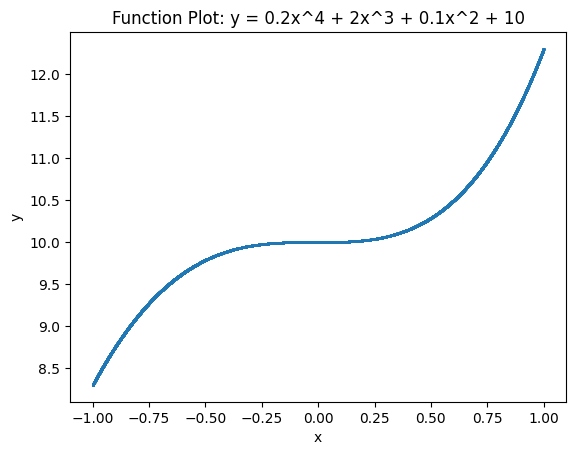

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras

def generate_samples():
    np.random.seed(42)  # Setting a seed for reproducibility

    # Generating 30,000 random samples for x within the range of -1 to 1
    x = np.random.uniform(low=-1, high=1, size=(30000,))

    # Calculating the corresponding y values using a polynomial function
    y = 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10

    return x, y

def get_dataset(shuffle_data=True):
    # Generating dataset
    x, y = generate_samples()

    if shuffle_data:
        # Shuffling the dataset
        indices = np.arange(len(x))
        np.random.shuffle(indices)
        x = x[indices]
        y = y[indices]

    return x, y

def shuffle_data(x, y):
    # Shuffling data samples
    indices = np.arange(len(x))
    np.random.shuffle(indices)
    return x[indices], y[indices]

# Getting data without shuffling
x, y = get_dataset(shuffle_data=False)

# Plotting the function
plt.scatter(x, y, s=1, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function Plot: y = 0.2x^4 + 2x^3 + 0.1x^2 + 10')
plt.show()


Q2. Function to split data into train, validation, and test sets:

In [2]:
def split_data(x, y, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5):
    # Checking if the sum of ratios is equal to 1.0
    assert train_ratio + val_ratio + test_ratio == 1.0, "The sum of ratios must be 1.0"

    # Checking if x and y have the same length
    assert len(x) == len(y), "x and y must have the same length"

    data_length = len(x)
    train_size = int(train_ratio * data_length)
    val_size = int(val_ratio * data_length)

    # Splitting data into training, validation, and test sets
    x_train = x[:train_size]
    y_train = y[:train_size]

    x_val = x[train_size:train_size+val_size]
    y_val = y[train_size:train_size+val_size]

    x_test = x[train_size+val_size:]
    y_test = y[train_size+val_size:]

    return x_train, y_train, x_val, y_val, x_test, y_test

In [3]:
# Generating shuffled dataset
x, y = get_dataset(shuffle_data=True)

# Splitting the dataset into training, validation, and test sets
x_train, y_train, x_val, y_val, x_test, y_test = split_data(x, y, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

# Displaying the sizes of the split datasets
print("Size of the training set:", len(x_train))
print("Size of the validation set:", len(x_val))
print("Size of the test set:", len(x_test))


Size of the training set: 9000
Size of the validation set: 6000
Size of the test set: 15000


Function to Calculate Metrics:

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def compute_evaluation_metrics(y_true, y_pred):
    # Calculating evaluation metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    return mae, mse, rmse, r2

# True target values
true_values = [1.2, 2.4, 3.6, 4.8, 6.0]

# Predicted values
predicted_values = [1.0, 2.2, 3.8, 4.6, 5.8]

# Compute evaluation metrics
mae, mse, rmse, r2 = compute_evaluation_metrics(true_values, predicted_values)

# Displaying the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))


Mean Absolute Error (MAE): 0.200
Mean Squared Error (MSE): 0.040
Root Mean Squared Error (RMSE): 0.200
R2 Score: 0.986


## Implementing Cases Using Keras Library for shuffled data:


Case 1:

Data: Shuffled and Unscaled

NN Structure: Structure 1

Activation Function: Relu

Epoch 1/20
750/750 [==============================] - 6s 4ms/step - loss: 22.0188 - val_loss: 0.1555
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0916 - val_loss: 0.0464
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0284 - val_loss: 0.0140
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0076 - val_loss: 0.0035
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 8/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 9/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 10/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0018 - val_loss: 0.001

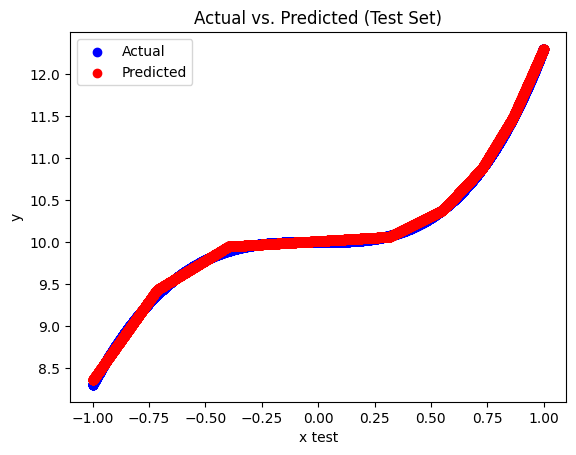

In [5]:
# Generating shuffled and unscaled dataset
x_data, y_data = get_dataset(shuffle_data=True)

# Splitting the data into train, validation, and test sets
x_train, y_train, x_val, y_val, x_test, y_test = split_data(x_data, y_data, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

# Defining the architecture of the neural network
model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(1,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)
])

# Compiling the model
model.compile(optimizer='adam', loss='mse')

# Training the model
history = model.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val))

# Evaluating the model on test data
test_loss = model.evaluate(x_test, y_test)

# Making predictions
y_pred = model.predict(x_test)

# Calculating evaluation metrics
mae, mse, rmse, r2 = compute_evaluation_metrics(y_test, y_pred)

# Displaying the computed metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plotting the actual test data vs. predicted data
plt.scatter(x_test, y_test, color='b', label='Actual')
plt.scatter(x_test, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Test Set)')
plt.legend()
plt.show()


Case 2:

Data: Shuffled and Unscaled

NN Structure: Structure 2

Activation Function: Relu

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 37.1399 - val_loss: 0.2064
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0974 - val_loss: 0.0736
Epoch 3/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0644 - val_loss: 0.0530
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0476 - val_loss: 0.0407
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0397 - val_loss: 0.0358
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0346 - val_loss: 0.0296
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0261 - val_loss: 0.0197
Epoch 8/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0157 - val_loss: 0.0107
Epoch 9/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0081 - val_loss: 0.0055
Epoch 10/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0045 - val_loss: 0.003

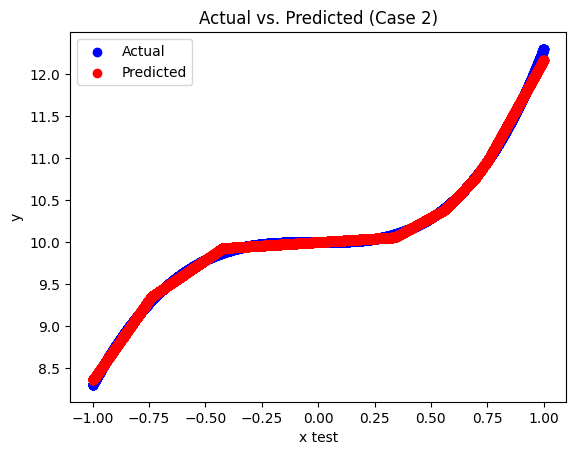

In [ ]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=True)

# Split the data into train, validation, and test sets
x_train, y_train, x_val, y_val, x_test, y_test = split_data(x, y, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(24, activation='relu', input_shape=(1,)),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val))

# Evaluate the model on test data
loss = model.evaluate(x_test, y_test)

# Make predictions
y_pred = model.predict(x_test)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(x_test, y_test, color='b', label='Actual')
plt.scatter(x_test, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 2)')
plt.legend()
plt.show()

Case 3:

Data: Shuffled and Unscaled

NN Structure: Structure 1

Activation Function: Tanh

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 48.4527 - val_loss: 23.3099
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 12.7990 - val_loss: 5.6873
Epoch 3/20
750/750 [==============================] - 3s 5ms/step - loss: 2.8228 - val_loss: 1.1882
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.7747 - val_loss: 0.5970
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.5752 - val_loss: 0.5677
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4673 - val_loss: 0.2825
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2226 - val_loss: 0.1802
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1387 - val_loss: 0.0876
Epoch 9/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0460 - val_loss: 0.0245
Epoch 10/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0153 - val_loss: 0.0

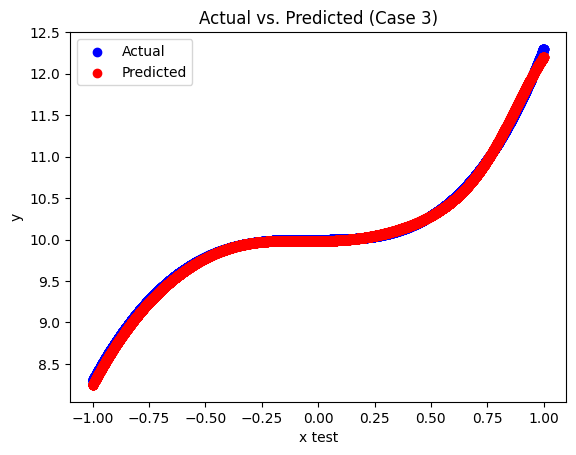

In [ ]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=True)

# Split the data into train, validation, and test sets
x_train, y_train, x_val, y_val, x_test, y_test = split_data(x, y, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(12, activation='tanh', input_shape=(1,)),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val))

# Evaluate the model on test data
loss = model.evaluate(x_test, y_test)

# Make predictions
y_pred = model.predict(x_test)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(x_test, y_test, color='b', label='Actual')
plt.scatter(x_test, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 3)')
plt.legend()
plt.show()

Case 4:

Data: Shuffled and scaled data. The data was firstly shuffled then split and then scaled for both x and y

NN Structure: Structure 1

Activation Function: Tanh

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0403 - val_loss: 0.0063
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0059 - val_loss: 0.0054
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0040 - val_loss: 0.0031
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0013 - val_loss: 8.6957e-04
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 6.0313e-04 - val_loss: 3.7900e-04
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 3.3240e-04 - val_loss: 2.6440e-04
Epoch 9/20
750/750 [==============================] - 2s 3ms/step - loss: 2.5721e-04 - val_loss: 2.1731e-04
Epoch 10/20
750/750 [==============================] - 2s 3ms/step - los

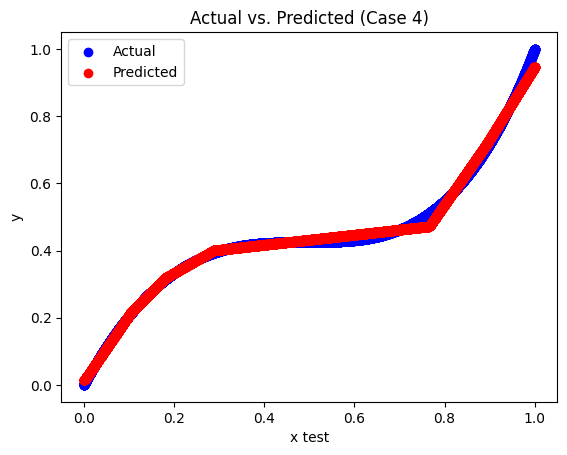

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Generate the shuffled and scaled dataset
x, y = get_dataset(shuffle_data=True)

#shuffle data
x, y = shuffle_data(x, y)

# Split the data into train, validation, and test sets
x_train, y_train, x_val, y_val, x_test, y_test = split_data(x, y, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

# Scale the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, 1)).flatten()
x_val = scaler.transform(x_val.reshape(-1, 1)).flatten()
x_test = scaler.transform(x_test.reshape(-1, 1)).flatten()
y_train = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val = scaler.transform(y_val.reshape(-1, 1)).flatten()
y_test = scaler.transform(y_test.reshape(-1, 1)).flatten()

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(1,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val))

# Evaluate the model on test data
loss = model.evaluate(x_test, y_test)

# Make predictions
y_pred = model.predict(x_test)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(x_test, y_test, color='b', label='Actual')
plt.scatter(x_test, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 4)')
plt.legend()
plt.show()

Case 5:

Data: Shuffled and scaled data. The data was firstly shuffled then split and then scaled for both x and y

NN Structure: Structure 1

Activation Function: Tanh

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0076 - val_loss: 0.0069
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0070 - val_loss: 0.0067
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0067 - val_loss: 0.0071
Epoch 4/20
750/750 [==============================] - 4s 6ms/step - loss: 0.0065 - val_loss: 0.0058
Epoch 5/20
750/750 [==============================] - 4s 6ms/step - loss: 0.0057 - val_loss: 0.0072
Epoch 6/20
750/750 [==============================] - 5s 6ms/step - loss: 0.0036 - val_loss: 0.0014
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 5.3764e-04 - val_loss: 3.5775e-04
Epoch 8/20
750/750 [==============================] - 2s 2ms/step - loss: 3.3766e-04 - val_loss: 3.7999e-04
Epoch 9/20
750/750 [==============================] - 2s 3ms/step - loss: 3.4403e-04 - val_loss: 2.7439e-04
Epoch 10/20
750/750 [==============================] - 2s 3ms/step - loss: 3

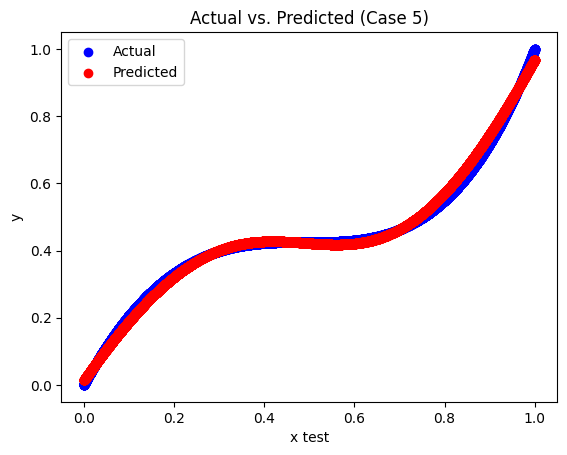

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Generate the shuffled and scaled dataset
x, y = get_dataset(shuffle_data=True)

# Shuffle the data
x, y = shuffle_data(x, y)

# Split the data into train, validation, and test sets
x_train, y_train, x_val, y_val, x_test, y_test = split_data(x, y, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

# Scale the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, 1)).flatten()
x_val = scaler.transform(x_val.reshape(-1, 1)).flatten()
x_test = scaler.transform(x_test.reshape(-1, 1)).flatten()
y_train = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val = scaler.transform(y_val.reshape(-1, 1)).flatten()
y_test = scaler.transform(y_test.reshape(-1, 1)).flatten()

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(12, activation='tanh', input_shape=(1,)),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val))

# Evaluate the model on test data
loss = model.evaluate(x_test, y_test)

# Make predictions
y_pred = model.predict(x_test)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(x_test, y_test, color='b', label='Actual')
plt.scatter(x_test, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 5)')
plt.legend()
plt.show()

## Implementing Cases Using Keras Library for Unshuffled Data Set:


Case 1:

Data: Unshuffled and Unscaled

NN Structure: Structure 1

Activation Function: Relu

Epoch 1/20
750/750 [==============================] - 4s 4ms/step - loss: 17.2188 - val_loss: 0.0819
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0430 - val_loss: 0.0221
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0111 - val_loss: 0.0048
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0031 - val_loss: 0.0022
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0010 - val_loss: 8.7020e-04
Epoch 8/20
750/750 [==============================] - 3s 4ms/step - loss: 8.7788e-04 - val_loss: 8.5009e-04
Epoch 9/20
750/750 [==============================] - 2s 3ms/step - loss: 6.9900e-04 - val_loss: 6.7946e-04
Epoch 10/20
750/750 [==============================] - 2s 3ms/step - loss: 6.15

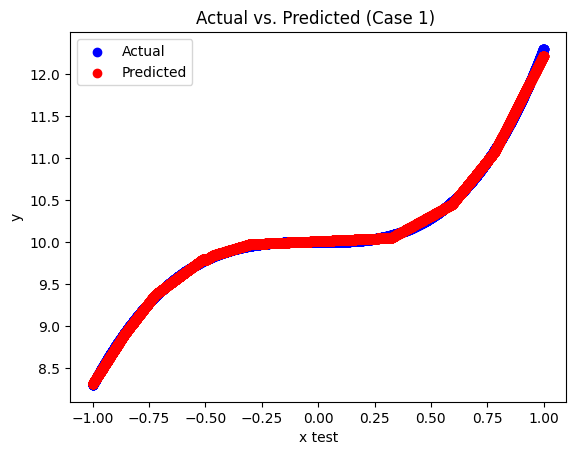

In [ ]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=False)

# Split the data into train, validation, and test sets
x_train, y_train, x_val, y_val, x_test, y_test = split_data(x, y, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(1,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val))

# Evaluate the model on test data
loss = model.evaluate(x_test, y_test)

# Make predictions
y_pred = model.predict(x_test)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(x_test, y_test, color='b', label='Actual')
plt.scatter(x_test, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 1) ')
plt.legend()
plt.show()

Case 2:

Data: Unshuffled and Unscaled

NN Structure: Structure 2

Activation Function: Relu

Epoch 1/20
750/750 [==============================] - 6s 6ms/step - loss: 35.2258 - val_loss: 0.1397
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0899 - val_loss: 0.0740
Epoch 3/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0630 - val_loss: 0.0537
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0459 - val_loss: 0.0393
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0349 - val_loss: 0.0310
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0270 - val_loss: 0.0226
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0180 - val_loss: 0.0147
Epoch 8/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0111 - val_loss: 0.0089
Epoch 9/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0073 - val_loss: 0.0064
Epoch 10/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0056 - val_loss: 0.005

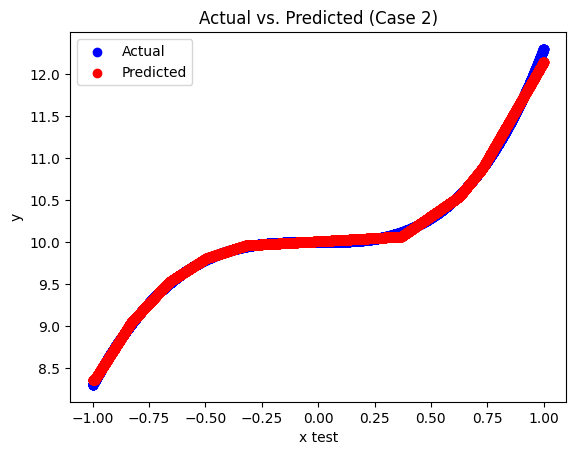

In [ ]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=False)

# Split the data into train, validation, and test sets
x_train, y_train, x_val, y_val, x_test, y_test = split_data(x, y, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(24, activation='relu', input_shape=(1,)),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val))

# Evaluate the model on test data
loss = model.evaluate(x_test, y_test)

# Make predictions
y_pred = model.predict(x_test)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(x_test, y_test, color='b', label='Actual')
plt.scatter(x_test, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 2)')
plt.legend()
plt.show()

Case 3:

Data: Unshuffled and Unscaled

NN Structure: Structure 1

Activation Function: Tanh

Epoch 1/20
750/750 [==============================] - 5s 6ms/step - loss: 40.8553 - val_loss: 17.3381
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 8.9052 - val_loss: 3.6635
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 1.7652 - val_loss: 0.8487
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.6436 - val_loss: 0.5901
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.5464 - val_loss: 0.3550
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2827 - val_loss: 0.2441
Epoch 7/20
750/750 [==============================] - 6s 8ms/step - loss: 0.1967 - val_loss: 0.1690
Epoch 8/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1180 - val_loss: 0.0689
Epoch 9/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0387 - val_loss: 0.0229
Epoch 10/20
750/750 [==============================] - 3s 5ms/step - loss: 0.0132 - val_loss: 0.00

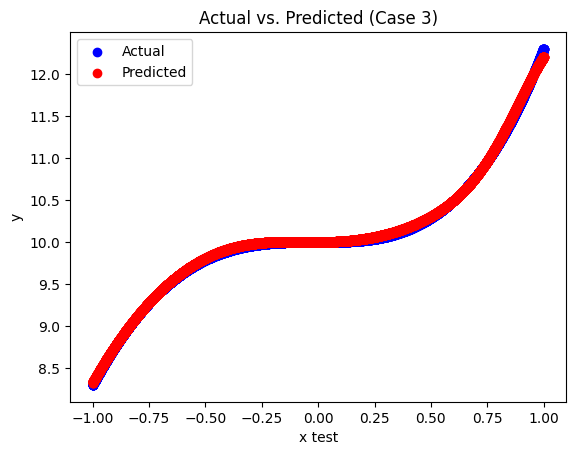

In [ ]:
# Generate the shuffled and unscaled dataset
x, y = get_dataset(shuffle_data=False)

# Split the data into train, validation, and test sets
x_train, y_train, x_val, y_val, x_test, y_test = split_data(x, y, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(12, activation='tanh', input_shape=(1,)),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val))

# Evaluate the model on test data
loss = model.evaluate(x_test, y_test)

# Make predictions
y_pred = model.predict(x_test)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(x_test, y_test, color='b', label='Actual')
plt.scatter(x_test, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 3)')
plt.legend()
plt.show()

Case 4:

Data: Unshuffled and Unscaled

NN Structure: Structure 1

Activation Function: Tanh

Epoch 1/20
750/750 [==============================] - 5s 5ms/step - loss: 0.0111 - val_loss: 0.0057
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0057 - val_loss: 0.0058
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0057 - val_loss: 0.0055
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0057 - val_loss: 0.0070
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 6/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0056 - val_loss: 0.0057
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0057 - val_loss: 0.0055
Epoch 9/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0056 - val_loss: 0.0058
Epoch 10/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0056 - val_loss: 0.0055

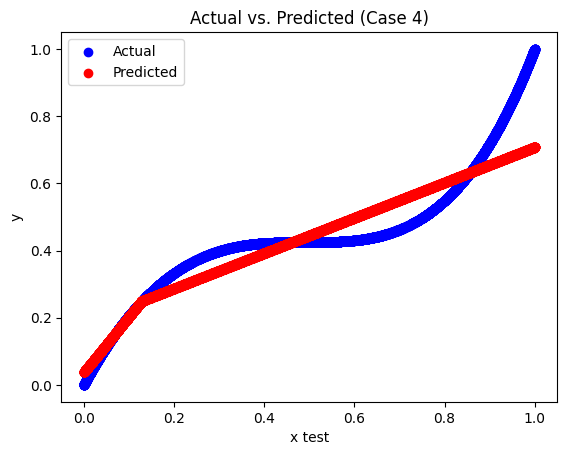

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Generate the shuffled and scaled dataset
x, y = get_dataset(shuffle_data=True)

#shuffle data
x, y = shuffle_data(x, y)

# Split the data into train, validation, and test sets
x_train, y_train, x_val, y_val, x_test, y_test = split_data(x, y, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

# Scale the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, 1)).flatten()
x_val = scaler.transform(x_val.reshape(-1, 1)).flatten()
x_test = scaler.transform(x_test.reshape(-1, 1)).flatten()
y_train = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val = scaler.transform(y_val.reshape(-1, 1)).flatten()
y_test = scaler.transform(y_test.reshape(-1, 1)).flatten()

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(1,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val))

# Evaluate the model on test data
loss = model.evaluate(x_test, y_test)

# Make predictions
y_pred = model.predict(x_test)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(x_test, y_test, color='b', label='Actual')
plt.scatter(x_test, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 4)')
plt.legend()
plt.show()

Case 5:

Data: Shuffled and scaled data. The data was firstly shuffled then split and then scaled for both x and y

NN Structure: Structure 1

Activation Function: Tanh

Epoch 1/20
750/750 [==============================] - 4s 4ms/step - loss: 0.0108 - val_loss: 0.0069
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0069 - val_loss: 0.0070
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0067 - val_loss: 0.0069
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0067 - val_loss: 0.0064
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0066 - val_loss: 0.0063
Epoch 6/20
750/750 [==============================] - 8s 11ms/step - loss: 0.0064 - val_loss: 0.0064
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0061 - val_loss: 0.0064
Epoch 8/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0057 - val_loss: 0.0052
Epoch 9/20
750/750 [==============================] - 3s 5ms/step - loss: 0.0047 - val_loss: 0.0036
Epoch 10/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0020 - val_loss: 5.753

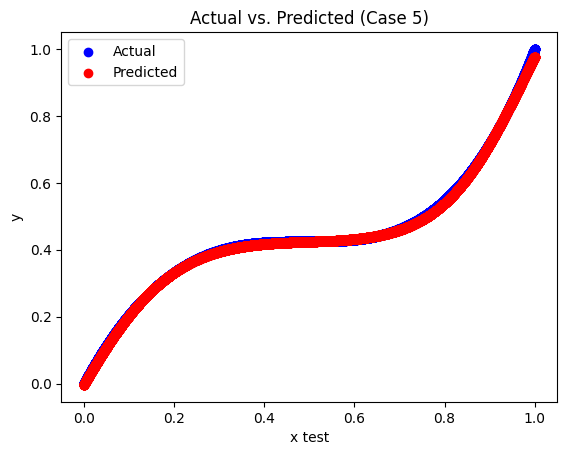

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Generate the shuffled and scaled dataset
x, y = get_dataset(shuffle_data=False)

# Shuffle the data
x, y = shuffle_data(x, y)

# Split the data into train, validation, and test sets
x_train, y_train, x_val, y_val, x_test, y_test = split_data(x, y, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

# Scale the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, 1)).flatten()
x_val = scaler.transform(x_val.reshape(-1, 1)).flatten()
x_test = scaler.transform(x_test.reshape(-1, 1)).flatten()
y_train = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val = scaler.transform(y_val.reshape(-1, 1)).flatten()
y_test = scaler.transform(y_test.reshape(-1, 1)).flatten()

# Define the structure of the neural network
model = keras.Sequential([
    keras.layers.Dense(12, activation='tanh', input_shape=(1,)),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val))

# Evaluate the model on test data
loss = model.evaluate(x_test, y_test)

# Make predictions
y_pred = model.predict(x_test)

# Calculate metrics
mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred)

# Print the calculated metrics
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R2 Score: {:.3f}".format(r2))

# Plot the actual test data vs. predicted data
plt.scatter(x_test, y_test, color='b', label='Actual')
plt.scatter(x_test, y_pred, color='r', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.title('Actual vs. Predicted (Case 5)')
plt.legend()
plt.show()

Q6. XOR Problem

In [6]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error loss function
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# Initialize the data and labels
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

# Neural Network parameters
input_size = 2
hidden_size = 2
output_size = 1
learning_rate = 0.1

# Initialize weights
weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
bias_hidden = np.zeros((1, hidden_size))
bias_output = np.zeros((1, output_size))

# Training the Neural Network
epochs = 10000
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    y_pred = sigmoid(output_layer_input)

    # Calculate the loss
    loss = mse_loss(y, y_pred)

    # Backward pass
    d_loss_d_ypred = -(y - y_pred)
    d_ypred_d_output = sigmoid_derivative(y_pred)

    error_term_output = d_loss_d_ypred * d_ypred_d_output
    error_term_hidden = np.dot(error_term_output, weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    # Gradient descent
    weights_hidden_output -= learning_rate * np.dot(hidden_layer_output.T, error_term_output)
    weights_input_hidden -= learning_rate * np.dot(X.T, error_term_hidden)

    bias_output -= learning_rate * np.sum(error_term_output, axis=0)
    bias_hidden -= learning_rate * np.sum(error_term_hidden, axis=0)

    # Print the loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# Make predictions
print("Predictions after training:")
print(y_pred)


Epoch 0, Loss: 0.25259467117126
Epoch 1000, Loss: 0.24837690890645658
Epoch 2000, Loss: 0.2306769021849917
Epoch 3000, Loss: 0.17745103616176264
Epoch 4000, Loss: 0.0856234765312496
Epoch 5000, Loss: 0.022551274185594026
Epoch 6000, Loss: 0.010553101886911784
Epoch 7000, Loss: 0.0065573301782565745
Epoch 8000, Loss: 0.0046670013579244145
Epoch 9000, Loss: 0.0035885376709372165
Predictions after training:
[[0.05643368]
 [0.9485143 ]
 [0.94823626]
 [0.05552737]]
